In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_fits = [1, 0]
all_germs = [1]
all_hards = [1, 0]
all_pGermBH = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
all_pGermWT = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
all_bankLength = [3, 5, 7]
all_fmean = [0.9, 1.0, 1.1]
all_fvar = [0.01, 0.05, 0.1]
all_N = [1.0,2.0,4.0,10.0,21.0,46.0,100.0,215.0,464.0,1000.0]

In [3]:
# import data
df = pd.read_csv('delayedgerm_dist_results_maxn=1000.csv', header=0)
df

,N,NPfix,fits,germs,hards,pGermBH,pGermWT,bankLength,fmean,fvar
0,1.0,1.00000,fd,gs,ss,0.5,0.6,3,1.1,0.05
1,2.0,1.23270,fd,gs,ss,0.5,0.6,3,1.1,0.05
2,4.0,0.96784,fd,gs,ss,0.5,0.6,3,1.1,0.05
3,10.0,0.46270,fd,gs,ss,0.5,0.6,3,1.1,0.05
4,21.0,0.19824,fd,gs,ss,0.5,0.6,3,1.1,0.05
...,...,...,...,...,...,...,...,...,...,...
38875,46.0,0.48300,fd,gs,hs,0.5,0.8,7,1.1,0.10
38876,100.0,0.48300,fd,gs,hs,0.5,0.8,7,1.1,0.10
38877,215.0,0.28165,fd,gs,hs,0.5,0.8,7,1.1,0.10
38878,464.0,0.07888,fd,gs,hs,0.5,0.8,7,1.1,0.10


In [4]:
def filter_df(df, vars_dict):
    for key in vars_dict:
        df = df[df[key] == vars_dict[key]]
    return df

In [5]:
def plot_npfix(df, var_name, var_vals, title, save=False, log=True):
    # plot NPfix vs N for each value of var_name
    fig, ax = plt.subplots(dpi=300, figsize=(12, 6))
    for val in var_vals:
        sub_df = df[df[var_name] == val]
        ax.plot(sub_df['N'], sub_df['NPfix'], label=val)
    # add horizontal line for neutral
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_xscale('log')
    if log:
        ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('NPfix')
    ax.set_title(title.replace('_', ' '))
    ax.legend(title=var_name)
    if save:
        plt.savefig(title + '.png')
    plt.show()

In [6]:
all_params = {
    'fits': all_fits,
    'hards': all_hards,
    'pGermBH': all_pGermBH,
    'pGermWT': all_pGermWT,
    'bankLength': all_bankLength,
    'fmean': all_fmean,
    'fvar': all_fvar,
}

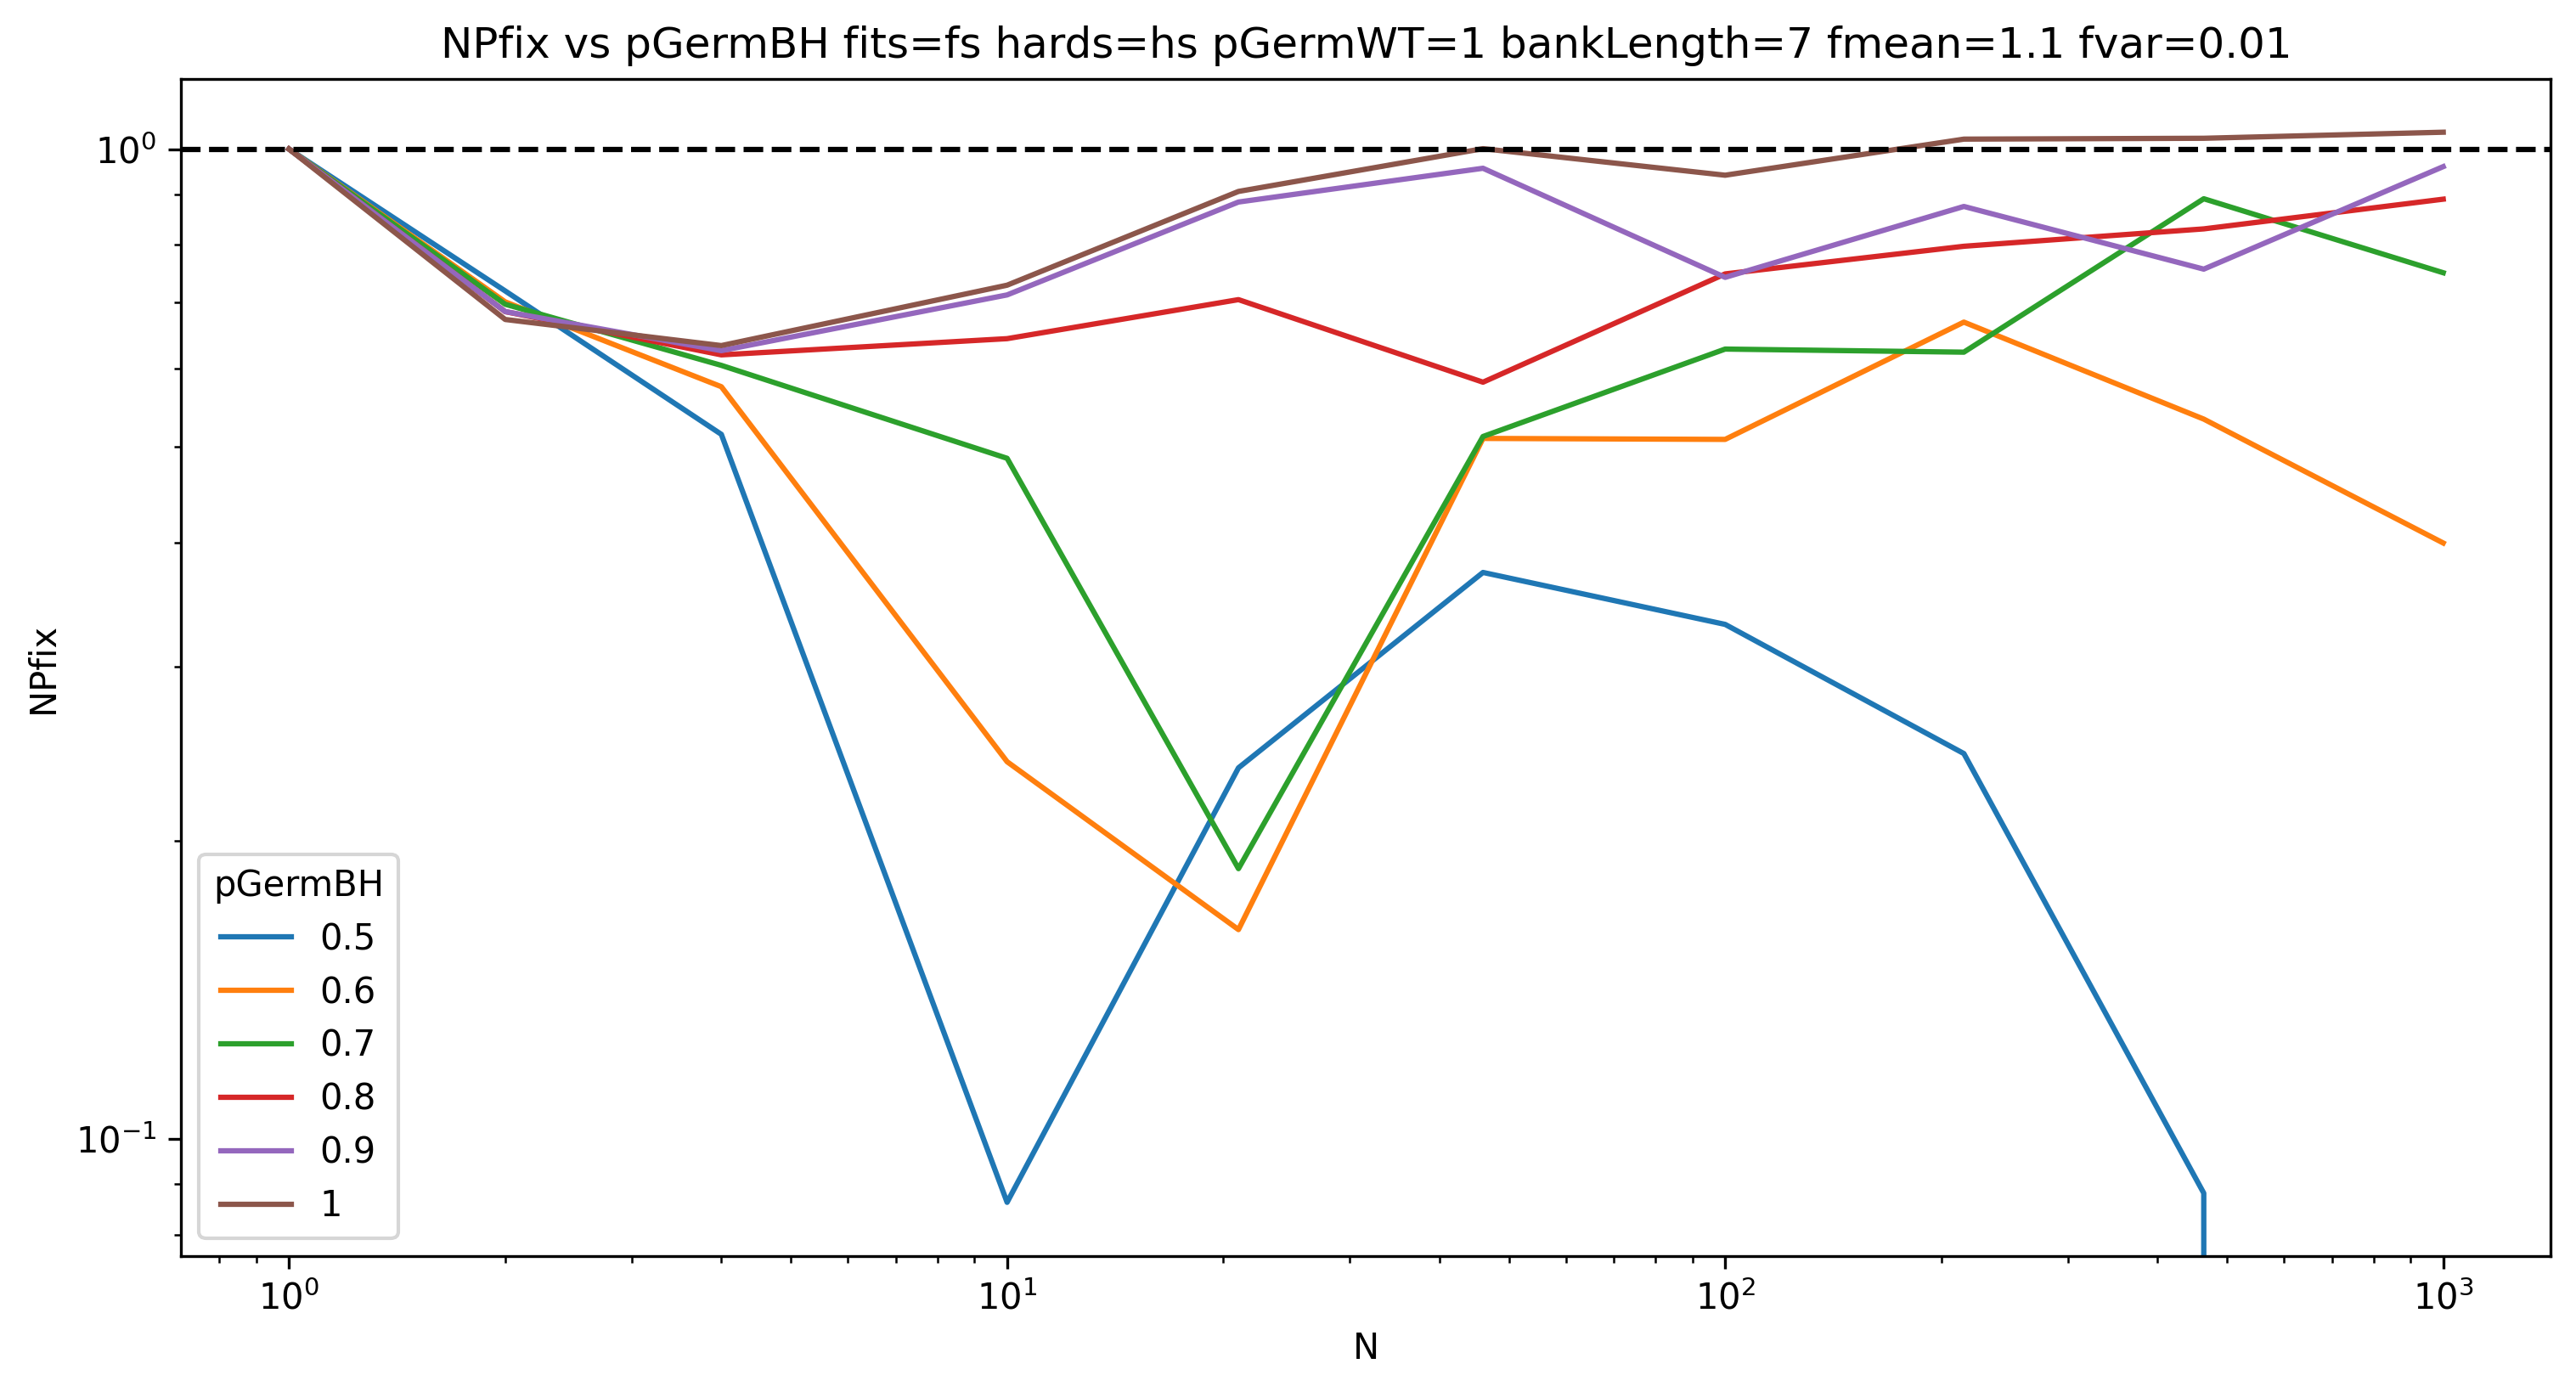

In [19]:
# comment out one of the following lines to plot all values of the corresponding parameter
filter_params = {
    'fits': 'fs', # [fs fd]
    'hards': 'hs', # [hs ss]
    # 'pGermBH': 0.5, # [0.5 0.6 0.7 0.8 0.9 1.0]
    'pGermWT': 1, # [0.5 0.6 0.7 0.8 0.9 1.0]
    'bankLength': 7, # [3 5 7]
    'fmean': 1.1, # [0.9 1.0 1.1]
    'fvar': 0.01, # [0.01 0.05 0.1]
}
for k, v in all_params.items():
    if k not in filter_params:
        plot_npfix(filter_df(df, filter_params),
                k, v,
                f'NPfix_vs_{k}_' +
                '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
                save=False)